(bcg_complete_mkts_final)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Irrelevance of Capital Structures with Complete Markets

```{contents} Contents
:depth: 2
```

In addition to what's in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade quantecon
!pip install interpolation
!conda install -y -c plotly plotly plotly-orca

Requirement already up-to-date: quantecon in /Users/matthewmckay/anaconda3/envs/phd-macro-theory-book/lib/python3.8/site-packages (0.4.8)


\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

done
Solving environment: - 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

done




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



## Introduction

This is a prolegomenon to another lecture {doc}`BCG_incomplete_mkts <BCG_incomplete_mkts>` about a model with
incomplete markets authored by Bisin, Clementi, and Gottardi {cite}`BCG_2018`.

We adopt specifications of preferences and technologies very close to
Bisin, Clemente, and Gottardi’s  but unlike them  assume that there are complete
markets in one-period Arrow securities.

This simplification of BCG’s setup helps us by

{cite}`Modigliani_Miller_1958`- creating a benchmark economy to compare with outcomes in BCG’s
  incomplete markets economy
- creating a good guess for initial values of some equilibrium objects
  to be computed in BCG’s incomplete markets economy via an iterative
  algorithm
- illustrating classic complete markets outcomes that include
    - indeterminacy of consumers’ portfolio choices
    - indeterminacy of firms' financial structures that underlies a
      Modigliani-Miller theorem 
- introducing `Big K, little k` issues in a simple context that will
  recur in the BCG incomplete markets environment

A Big K, little k analysis also played roles in [this quantecon lecture](https://python.quantecon.org/cass_koopmans.html) as well  as
[here](https://python.quantecon.org/rational_expectations.html) and {doc}`here <dyn_stack>`.

### Setup

The economy lasts for two periods, $t=0, 1$.

There are two types of consumers named :math:`i=1,2`

A scalar random variable $\epsilon$ with probability density $g(\epsilon)$ affects both

- the physical return in period $1$ from investing
  $k \geq 0$ in capital in period $0$.
- exogenous period $1$ endowments of the consumption good for
  agents of types $i =1$ and $i=2$.

Type $i=1$ and $i=2$ agents’ period $1$ endowments are
correlated with the physical return on capital in different ways.

We discuss two arrangements:

- a command economy in which a benevolent planner chooses $k$ and
  allocates goods to the two types of  consumers in each period and each random
  second period state
- a competitive equilibrium with markets in claims on physical capital
  and a complete set (possibly a continuum) of one-period Arrow
  securities that pay period $1$ consumption goods contingent on
  the realization of random variable $\epsilon$.

### Endowments

There is a single consumption good in period $0$ and at each
random state $\epsilon$ in period $1$.

Economy-wide endowments in periods $0$ and $1$ are

$$
\begin{aligned}
w_0 & \cr
w_1(\epsilon) &  \textrm{ in state }\epsilon
\end{aligned}
$$

Soon we’ll explain how aggregate endowments are divided between
type $i=1$ and type $i=2$ consumers.

We don’t need to do that in order to describe a social planning problem.

### Technology:

Where $\alpha \in (0,1)$ and $A >0$

$$
\begin{aligned}
 c_0^1 + c_0^2 & = w_0^1 + w_0^2 - k \cr
 c_1^1(\epsilon) + c_1^2(\epsilon) & =  w_1^1(\epsilon) + w_1^2(\epsilon) + e^\epsilon A k^\alpha, \quad k \geq 0
\end{aligned}
$$

### Preferences:

A consumer of type $i$ orders period $0$ consumption
$c_0^i$ and state $\epsilon$, period $1$ consumption
$c^i_1(\epsilon)$ by

$$
u^i = u(c_0^i) + \beta \int u(c_1^i(\epsilon)) g (\epsilon) d \epsilon, \quad i = 1,2
$$

$\beta \in (0,1)$ and the one-period utility function is

$$
u(c) = \begin{cases}
\frac{c^{1 -\gamma}} { 1 - \gamma} & \textrm{if  } \gamma \neq 1 \\
\log c & \textrm{if  } \gamma = 1
\end{cases}
$$

### Shock distribution:

Sometimes we assume that

$$
\epsilon \sim g(\epsilon) = {\mathcal N}(0,1)
$$

At other times, we’ll instead assume that $g(\cdot)$ is a probability
mass function that serves as a discrete approximation to a standardized
normal density.

### Example parameterizations

Following BCG, we shall employ the following parameterizations:

$$
\begin{aligned}
\epsilon & \sim {\mathcal N}(\mu, \sigma^2) \cr
u(c) & = \frac{c^{1-\gamma}}{1 - \gamma} \cr
w_1^i & = e^{- \chi_i \mu - .5 \chi_i^2 \sigma^2 + \chi \epsilon} , \quad \chi_i \in [0,1]
\end{aligned}
$$

### Pareto criterion and planning problem

The planner’s objective function is

$$
\textrm{obj} = \phi_1 u^1 + \phi_2 u^2 , \quad \phi_i \geq 0,  \phi_1 + \phi_2 = 1
$$

where $\phi_i \geq 0$ is a Pareto weight that the planner attaches
to a consumer of type  $i$.

We form the following Lagrangian for the planner’s problem:

$$
\begin{aligned} L & = \sum_{i=1}^2 \phi_i \left[ u(c_0^i) + \beta \int u(c_1^i(\epsilon)) g (\epsilon) d \epsilon \right] \cr
                 & + \lambda_0 \left[  w_0^1 + w_0^2 - k - c_0^1 - c_0^2 \right] \cr
                 & + \beta \int \lambda_1(\epsilon) \left[ w_1^1(\epsilon) + w_1^2(\epsilon) + e^\epsilon A k^\alpha -
                   c_1^1(\epsilon) - c_1^2(\epsilon)\right]  g(\epsilon) d\epsilon
\end{aligned}
$$

First-order necessary optimality conditions for the planning problem are:

$$
\begin{aligned}
c_0^1: \quad &  \phi_1 u'(c_0^1) - \lambda_0   = 0 \cr
c_0^2: \quad &  \phi_2 u'(c_0^2) - \lambda_0  = 0 \cr
c_1^1(\epsilon): \quad  & \phi_1 \beta u'(c_1^1(\epsilon)) g(\epsilon) - \beta \lambda_1 (\epsilon) g (\epsilon)   = 0 \cr
c_1^2(\epsilon):\quad  &  \phi_2 \beta u'(c_1^2(\epsilon)) g(\epsilon) - \beta \lambda_1 (\epsilon) g (\epsilon)  = 0 \cr
k:  \quad &  -\lambda_0 + \beta \alpha A k^{\alpha -1} \int \lambda_1(\epsilon) e^\epsilon g(\epsilon) d \epsilon  = 0
\end{aligned}
$$

The first four equations imply that

$$
\begin{aligned}
\frac{u'(c_1^1(\epsilon))}{u'(c_0^1))} & =  \frac{u'(c_1^2(\epsilon))}{u'(c_0^2))}  = \frac{\lambda_1(\epsilon)}{\lambda_0} \cr
\frac{u'(c_0^1)}{u'(c_0^2)} & = \frac{u'(c_1^1(\epsilon))}{u'(c_1^2(\epsilon))}  = \frac{\phi_2}{\phi_1}
\end{aligned}
$$

These together with the fifth first-order condition for the planner
imply the following equation that determines an optimal choice of
capital

$$
1 = \beta \alpha A k^{\alpha -1} \int \frac{u'(c_1^i(\epsilon))}{u'(c_0^i)} e^\epsilon g(\epsilon) d \epsilon
$$

for $i = 1,2$.

### Helpful observations and bookkeeping

Evidently,

$$
u'(c) = c^{-\gamma}
$$

and

$$
\frac{u'(c^1)}{u'(c^2)} = \left(\frac{c^1}{c^2}\right)^{-\gamma} = \frac{\phi_2}{\phi_1}
$$

where it is to be understood  that this equation holds for $c^1 = c^1_0$ and $c^2 = c^2_0$ and also
for $c^1 = c^1(\epsilon)$ and $c^2 = c^2(\epsilon)$ for all $\epsilon$.

With the same understanding, it follows that

$$
\left(\frac{c^1}{c^2}\right) = \left(\frac{\phi_2}{\phi_1}\right)^{- \gamma^{-1}}
$$

Let $c= c^1 + c^2$.

It follows from the preceding equation that

$$
\begin{aligned}
  c^1 & = \eta c \cr
  c^2 & = (1 -\eta) c
\end{aligned}
$$

where $\eta \in [0,1]$ is a function of $\phi_1$ and
$\gamma$.

Consequently, we can write the planner’s first-order condition for
$k$ as

$$
1 =  \beta \alpha A k^{\alpha -1} \int \left( \frac{w_1(\epsilon) + A k^\alpha e^\epsilon}
                   {w_0 - k } \right)^{-\gamma} g(\epsilon) d \epsilon
$$

which is one equation to be solved for $k \geq 0$.

Anticipating a `Big K, little k` idea widely used in macroeconomics,
to be discussed in detail below, let $K$ be the value of $k$
that solves the preceding equation so that

```{math}
:label: focke

1 =  \beta \alpha A K^{\alpha -1} \int \left( \frac{w_1(\epsilon) + A K^\alpha e^\epsilon}
                    {w_0 - K } \right)^{-\gamma} g(\epsilon) d \epsilon
```

The associated optimal consumption allocation is

$$
\begin{aligned}
C_0 & = w_0 - K \cr
C_1(\epsilon) & = w_1(\epsilon) + A K^\alpha e^\epsilon \cr
c_0^1 & = \eta C_0 \cr
c_0^2 & = (1 - \eta) C_0 \cr
c_1^1(\epsilon) & = \eta C^1 (\epsilon) \cr
c_1^2 (\epsilon) & = (1 - \eta) C_1(\epsilon)
\end{aligned}
$$

where $\eta \in [0,1]$ is the consumption share parameter
mentioned above that is a function of the Pareto weight $\phi_1$
and the utility curvature parameter $\gamma$.

#### Remarks

The relative Pareto weight parameter $\eta$ does not appear in
equation {eq}`focke` that determines $K$.

Neither does it influence $c_0$ or $c_1(\epsilon)$, which
depend solely on $K$.

The role of $\eta$ is to determine how to allocate total
consumption between the two types of consumers.

Thus, the planner’s choice of $K$ does not interact with how it wants to allocate  consumption.

## Competitive equilibrium

We now describe a competitive equilibrium for an economy that has
specifications of consumer preferences, technology, and aggregate
endowments that are identical to those in the preceding planning
problem.

While prices do not  appear in the planning problem – only quantities –
prices play an important role in a competitive equilibrium.

To understand how the planning economy is related to a competitive
equilibrium, we now turn to  the `Big K, little k` distinction.

### Measures of agents and firms

We follow BCG in assuming that there are equal unit measures of

- consumers of type $i=1$
- consumers of type $i=2$
- firms with access to the production technology that converts
  $k$ units of time $0$ good into
  $A k^\alpha e^\epsilon$ units of the time $1$ good in
  random state $\epsilon$

Thus, let $\omega \in [0,1]$ index a particular consumer of type
$i$. Then define Big $C^i$ as

$$
C^i = \int c^i(\omega) d \, \omega
$$

In the same spirit, let $\zeta \in [0,1]$ index a particular firm.
Then define Big $K$ as

$$
K = \int k(\zeta) d \, \zeta
$$

The assumption that there are continua of our three types of
agents plays an important role making each individual agent into a
powerless **price taker**:

- an individual consumer chooses its own (infinesimal) part
  $c^i(\omega)$ of $C^i$ taking prices as given
- an individual firm chooses its own (infinitesmimal) part
  $k(\zeta)$ of $K$ taking prices as
- equilibrium prices depend on the `Big K, Big C` objects
  $K$ and $C$
- in equilibrium, it turns out that $K = k, C^i = c^i$

The assumption about measures of agents is thus a powerful device for
making a host of competitive agents take as given the equilibrium prices
that turn out to be determined by the decisions of hosts of agents who behave just like they do.

#### Ownership

Consumers of type $i$ own the following exogenous amounts of
the consumption good in periods $0$ and $1$:

$$
\begin{aligned}
 w_0^i, & \quad i = 1,2 \cr
 w_1^i(\epsilon) & \quad i = 1,2
\end{aligned}
$$

where

$$
\begin{aligned}
\sum_i w_0^i & = w_0 \cr
\sum_i w_1^i(\epsilon) & = w_1(\epsilon)
\end{aligned}
$$

Consumers also own shares in  a firm that operates the technology for converging
nonnegative amounts of the time $0$ consumption good one-for-one
into a capital good $k$ that produces
$A k^\alpha e^\epsilon$ units of time $1$ consumption good
in time $1$ state $\epsilon$.

Consumers of types $i=1,2$ are endowed with $\theta_0^i$
shares of a firm and

$$
\theta_0^1 + \theta_0^2 = 1
$$

#### Asset markets

At time $0$, consumers trade the following assets with each other
and with firms:

- equity issued by firms
- one-period Arrow securities that pay one unit of consumption at time
  $1$ when the shock $\epsilon$ assumes a particular value

Later, we’ll allow the firm to issue bonds in addition to equity, but
not now.

### Objects appearing in a competitive equilibrium

We let

- $a^i(\epsilon)$ be consumer $i$’s purchases of claims
  on time $1$ consumption in state $\epsilon$
- $q(\epsilon)$ be a pricing kernel for one-period Arrow
  securities
- $\theta_0^i \geq 0$ be consumer $i$’s intial share of
  the firm, $\sum_i \theta_0^i =1$
- $\theta^i$ be the fraction of the firm’s shares purchased by
  consumer $i$ at time $t=0$
- $V$ be the value of the representative firm
- $\tilde V$ be the value of equity issued by the representative
  firm
- $K, C_0$ be two scalars and $C_1(\epsilon)$ a function
  that we use to construct a guess of an equilibrium  pricing kernel
  for Arrow securities

We proceed  to describe constrained optimum problems faced by
consumers and a representative firm in a competitive equilibrium.

### A representative firm’s problem

A representative firm takes Arrow security prices $q(\epsilon)$ as
given and finances itself entirely by issuing equity.

The firm purchases capital $k \geq 0$ from consumers at time
$0$ and finances itself by issuing equity at time $0$.

The firm produces time $1$ goods $A k^\alpha e^\epsilon$ in
state $\epsilon$ and pays all of these `earnings` to owners of its
equity.

The value of a firm's equity at time $0$ can be computed by multiplying
its state-contingent earnings by their Arrow securities prices and then
adding over all contingencies:

$$
\tilde V = \int A k^\alpha e^\epsilon q(\epsilon) d \epsilon
$$

Thus, the firm’s problem is to choose $k$ to maximize

$$
V = - k + \int A k^\alpha e^\epsilon q(\epsilon) d \epsilon
$$

The firm's first-order necessary condition for an optimal $k$ is

$$
- 1 + \alpha A k^{\alpha -1} \int e^\epsilon q(\epsilon) d \epsilon = 0
$$

The time $0$ value of a representative firm is

$$
V = - k + \tilde V
$$

The right side equals the value of equity minus the cost of the time $0$ goods
that it purchases and uses as capital.

### A consumer’s problem

We now pose a consumer’s problem in a competitive equilibrium.

As a price taker, each consumer faces a given Arrow securities pricing kernel
$q(\epsilon)$, a given value of a firm $V$ that has chosen capital stock $k$, a price of
equity $\tilde V$, and given prospective random dividends next period $A k^\alpha e^\epsilon$.

Consumer $i$ chooses a scalar $c_0^i$ and a function
$c_1^i(\epsilon)$ to maximize

$$
u(c_0^i) + \beta \int u(c_1^i(\epsilon)) g (\epsilon) d \epsilon
$$

subject to time $0$ and time $1$ budget constraints

$$
\begin{aligned}
c_0^i & \leq w_0^i +\theta_0^i V - \int q(\epsilon) a^i(\epsilon) d \epsilon - \theta^i \tilde V \cr
c_1^i & \leq w_1^i(\epsilon) +\theta^i A k^\alpha e^\epsilon + a^i(\epsilon)
\end{aligned}
$$

Attach Lagrange multiplier $\lambda_0^i$ to the budget constraint
at time $0$ and scaled Lagrange multiplier
$\beta \lambda_1^i(\epsilon) g(\epsilon)$ to the budget constraint
at time $1$ and state $\epsilon$ and form the Lagrangian

$$
\begin{aligned}
L^i & = u(c_0^i) + \beta \int u(c^i_1(\epsilon)) g(\epsilon) d \epsilon \cr
     & + \lambda_0^i [ w_0^i + \theta_0^i - \int q(\epsilon) a^i(\epsilon) d \epsilon -
          \theta^i \tilde V - c_0^i ] \cr
      & + \beta \int \lambda_1^i(\epsilon) [ w_1^i(\epsilon) + \theta^i A k^\alpha e^\epsilon
           + a^i(\epsilon) c_1^i(\epsilon) g(\epsilon)] d \epsilon
\end{aligned}
$$

First-order necessary conditions for an optimum with respect to
$c_0^i, c_1^i(\epsilon)$, and $a^i(\epsilon)$ are

$$
\begin{aligned}
c_0^i: \quad &   u'(c_0^i) - \lambda_0^i = 0 \cr
c_1^i(\epsilon): \quad & \beta u'(c_1^i(\epsilon)) g(\epsilon) - \beta \lambda_1^i(\epsilon) g(\epsilon)       = 0 \cr
a^i(\epsilon): \quad & -\lambda_0^i q(\epsilon) + \beta \lambda_1^i(\epsilon) = 0
\end{aligned}
$$

These equations imply that consumer $i$ adjusts its consumption
plan to satisfy

```{math}
:label: qgeqn

q(\epsilon) = \beta \left( \frac{u'(c_1^i(\epsilon))}{u'(c_0^i)} \right) g(\epsilon)
```

To deduce a restriction on the consumer’s choice of $\theta^i$ we
solve the period $1$ budget constraint to express
$a^i(\epsilon)$ as

$$
a^i(\epsilon) = c_1^i(\epsilon) - w_1^i(\epsilon) - \theta^i A k^\alpha e^\epsilon
$$

then substitute the expression on the right side into the time $0$
budget constraint and rearrange to get the single intertemporal budget
constraint

```{math}
:label: noarb

w_0^i + \theta_0^i V + \int w_1^i(\epsilon) q(\epsilon) d \epsilon + \theta^i \left[ A k^\alpha \int e^\epsilon q(\epsilon) d \epsilon - \tilde V \right]
\geq c_0^i + \int c_1^i(\epsilon) q(\epsilon) d \epsilon
```

The right side of equation {eq}`noarb` is the present value
of consumer $i$’s consumption while the left side is the present
value of consumer $i$’s endowment when consumer $i$ buys
$\theta^i$ shares of equity. From this equation, we deduce two
findings.

**1. No arbitrage profits condition:**

Unless

```{math}
:label: tilde

\tilde V =  A k^\alpha \int e^\epsilon q (\epsilon) d \epsilon
```

an **arbitrage** opportunity would be open to  consumers.

If

$$
\tilde V > A k^\alpha \int e^\epsilon q (\epsilon) d \epsilon
$$

the consumer could sustain an arbitrarily high present value of  consumption by setting $\theta^i$ to an arbitrarily large **negative**
number.

If

$$
\tilde V <  A k^\alpha \int e^\epsilon q (\epsilon) d \epsilon
$$

the consumer could sustain an arbitrarily high present value of
consumption by setting $\theta^i$ to be arbitrarily large **positive**
number.

Since resources are finite, there cannot exist such arbitrage
opportunities in a competitive equilibrium.

Therefore, it must be true
that the following no arbitrage condition prevails {eq}`tildeV20` holds:

```{math}
:label: tildeV20

\tilde V = \int A k^\alpha e^\epsilon q(\epsilon;K) d \epsilon
```

Equation {eq}`tildeV20` asserts that the value of equity
equals the value of the state-contingent dividends
$Ak^\alpha e^\epsilon$ evaluated at the Arrow security prices
$q(\epsilon; K)$ that we have expressed as a function of $K$.

We'll say more about this equation below.

**2. Indeterminacy of** $\theta^i$ **:**

When the no-arbitrage pricing equation {eq}`tildeV20`
prevails, a consumer of type $i$’s choice $\theta^i$ of equity is
indeterminate.

Consumer of type $i$ can offset any choice of
$\theta^i$ by setting an appropriate  schedule $a^i(\epsilon)$ for purchasing  state-contingent
securities.

### Computing competitive equilibrium prices and quantities

Having computed the allocation that solves the planning problem, we can
readily compute a competitive equilibrium via the following steps that,
as we’ll see, relies heavily on the `Big K, little k`,
`Big C, little c` logic mentioned earlier:

- a competitive equilbrium allocation equals the allocation chosen by
  the planner
- competitive equilibrium prices and the value of a firm’s equity can
  be backed out from shadow prices from the planning problem that
  depend on Big $K$ and Big $C$.

To substantiate that this procedure is valid, we proceed as follows.

With $K$ in hand, we make the following guess for competitive
equilibrium Arrow securities prices

$$
q(\epsilon;K) = \beta \left( \frac{u'\left( w_1(\epsilon) + A K^\alpha e^\epsilon\right)} {u'(w_0 - K )} \right)
$$

To confirm the guess, we begin by considering the consequences of this
guess for the firm’s choice of $k$.

With the Arrow securities prices that we have guessed, the firm’s
first-order necessary condition for choosing $k$ becomes

```{math}
:label: kK

-1 + \alpha A k^{\alpha -1} \int e^\epsilon q(\epsilon;K) d \epsilon = 0
```

which can be verified to be satisfied if the firm sets

$$
k = K
$$

because by setting $k=K$ equation {eq}`kK` becomes
equivalent with the planner’s first-order condition
{eq}`focke` for setting $K$.

To pose a consumer’s problem in a competitive equilibrium, we require
not only the above guess for the Arrow securities pricing kernel
$q(\epsilon)$ but the value of equity $\tilde V$.

```{math}
:label: tildeV2

\tilde V = \int A K^\alpha e^\epsilon q(\epsilon;K) d \epsilon
```

Let $\tilde V$ be the value of equity implied by Arrow securities
price function {eq}`kK` and formula
{eq}`tildeV2`.

At the given prices {eq}`kK` and
{eq}`tildeV2` for $q(\epsilon)$ and $\tilde V$,
consumer $i=1,2$ choose consumption allocations and portolios
that satisfy the first-order necessary conditions

$$
\beta \left( \frac{u'(c_1^i(\epsilon))}{u'(c_0^i)} \right) g(\epsilon) = q(\epsilon;K)
$$

It can be verified directly that the following choices satisfy these
equations

$$
\begin{aligned}
c_0^1 + c_0^2 & = C_0 = w_0 - K \cr
c_0^1(\epsilon) + c_0^2(\epsilon) & = C_1(\epsilon) =  w_1(\epsilon) + A k^\alpha e ^\epsilon \cr
\frac{c_1^2(\epsilon)}{c_1^1(\epsilon)} & = \frac{c_0^2}{c_0^1} = \frac{1-\eta}{\eta}
\end{aligned}
$$

for an $\eta \in (0,1)$ that  depends on consumers’
endowments
$[w_0^1, w_0^2, w_1^1(\epsilon), w_1^2(\epsilon), \theta_0^1, \theta_0^2 ]$.

**Remark:** Multiple arrangements of endowments
$[w_0^1, w_0^2, w_1^1(\epsilon), w_1^2(\epsilon), \theta_0^1, \theta_0^2 ]$
associated with the same $\eta$. Can you explain why?
**Hint:** Think about the portfolio indeterminacy finding above.

### Modigliani-Miller theorem

Now allow a firm to issue both bonds and equity.

Payouts from equity and bonds, respectively, are

$$
\begin{aligned}
d^e(k,b;\epsilon) &= \max \left\{ e^\epsilon A k^\alpha - b, 0 \right\} \\
d^b(k,b;\epsilon) &= \min \left\{ \frac{e^\epsilon A k^\alpha}{b}, 1 \right\}
\end{aligned}
$$

Thus, one unit of the bond pays $1$ unit of consumption at time
$1$ in state $\epsilon$ if
$A k^\alpha e^\epsilon - b \geq 0$, which is true when
$\epsilon \geq \epsilon^* = \log \frac{b}{Ak^\alpha}$, and pays
$\frac{A k^\alpha e^\epsilon}{b}$ units of time $1$
consumption in state $\epsilon$ when
$\epsilon < \epsilon^*$.

The value of the firm is now the sum of equity plus the value of bonds,
which we denote

$$
\tilde V + b p(k,b)
$$

where $p(k,b)$ is the price of one unit of the bond when a firm
with $k$ units of physical capital issues $b$ bonds.

We continue to assume that there are complete markets in Arrow
securities with pricing kernel $q(\epsilon)$.

A version of the  no-arbitrage-in-equilibrium argument that we presented
earlier implies that the value of equity and the price of bonds are

$$
\begin{aligned}
\tilde V & = A k^\alpha \int_{\epsilon^*}^\infty e^\epsilon q(\epsilon) d \epsilon - b \int_{\epsilon^*}^\infty  q(\epsilon) d \epsilon\cr
p(k, b) & =   \frac{A k^\alpha}{B} \int_{-\infty}^{\epsilon^*} e^\epsilon q(\epsilon) d \epsilon
      + \int_{\epsilon^*}^\infty q(\epsilon) d \epsilon
\end{aligned}
$$

Consequently, the value of the firm is

$$
\tilde V + p(k,b) b =  A k^\alpha \int_{-\infty}^\infty e^\epsilon q(\epsilon) d \epsilon,
$$

which is the same expression that we obtained above when we assumed that
the firm issued only equity.

We thus obtain a version of the celebrated Modigliani-Miller theorem {cite}`Modigliani_Miller_1958`
about firms’ finance:

**Modigliani-Miller theorem:**

- The value of a firm is independent the mix of equity and bonds that
  it uses to finance its physical capital.
- The firms’s decision of how much physical capital to purchase does
  not depend on whether it finances capital purchases by issuing bonds
  or equity
- The firm’s choice of whether to finance itself by issuing equity or
  bonds is indeterminant

Please note the role of the assumption of complete markets in Arrow
securities in substantiating these claims.

In {doc}`Equilibrium Capital Structures with Incomplete Markets <BCG_incomplete_mkts>`, we will assume that markets are (very)
incomplete – we’ll shut down markets in almost all Arrow securities.

That will pull the rug from underneath the Modigliani-Miller theorem.

## Code

We create a class object `BCG_complete_markets` to compute
equilibrium allocations of the complete market BCG model given a list
of parameter values.

It consists of 4 functions that do the following things:

> 

* `opt_k` computes the planner's optimal capital $K$
    - First, create a grid for capital.
    - Then for each value of capital stock in the grid, compute the left side of the planner's
      first-order necessary condition for  $k$, that is,
      
      $$
      \beta \alpha A K^{\alpha -1} \int \left( \frac{w_1(\epsilon) + A K^\alpha e^\epsilon}{w_0 - K } \right)^{-\gamma} g(\epsilon) d \epsilon  - 1 =0
      $$
      
    - Find $k$ that solves this equation.
* `q` computes Arrow security prices as a function of the productivity shock $\epsilon$ and capital $K$:
  
  $$
  q(\epsilon;K) = \beta \left( \frac{u'\left( w_1(\epsilon) + A K^\alpha e^\epsilon\right)} {u'(w_0 - K )} \right)
  $$
  
* `V` solves for the firm value given capital $k$:
  
  $$
  V = - k + \int A k^\alpha e^\epsilon q(\epsilon; K) d \epsilon
  $$
  
* `opt_c` computes optimal consumptions $c^i_0$, and $c^i(\epsilon)$:
    - The function first computes weight $\eta$ using the
      budget constraint for agent 1:
      
      $$
      w_0^1 + \theta_0^1 V + \int w_1^1(\epsilon) q(\epsilon) d \epsilon
      = c_0^1 + \int c_1^1(\epsilon) q(\epsilon) d \epsilon
      = \eta \left( C_0 + \int C_1(\epsilon) q(\epsilon) d \epsilon \right)
      $$
      where
      
      $$
      \begin{aligned}
      C_0 & = w_0 - K \cr
      C_1(\epsilon) & = w_1(\epsilon) + A K^\alpha e^\epsilon \cr
      \end{aligned}
      $$
      
    - It computes consumption for each agent as
* $$
  \begin{aligned}
  c_0^1 & = \eta C_0 \cr
  c_0^2 & = (1 - \eta) C_0 \cr
  c_1^1(\epsilon) & = \eta C_1 (\epsilon) \cr
  c_1^2 (\epsilon) & = (1 - \eta) C_1(\epsilon)
  \end{aligned}
  $$
  

The list of parameters includes:

- $\chi_1$, $\chi_2$: Correlation parameters for agents 1
  and 2. Default values are 0 and 0.9, respectively.
- $w^1_0$, $w^2_0$: Initial endowments. Default values are 1.
- $\theta^1_0$, $\theta^2_0$: Consumers’ initial shares of
  a representative firm. Default values are 0.5.
- $\psi$: CRRA risk parameter. Default value is 3.
- $\alpha$: Returns to scale production function parameter.
  Default value is 0.6.
- $A$: Productivity of technology. Default value is 2.5.
- $\mu$, $\sigma$: Mean and standard deviation of the log of the shock.
  Default values are -0.025 and 0.4, respectively.
- $\beta$: time preference discount factor. Default value is .96.
- `nb_points_integ`: number of points used for integration through
  Gauss-Hermite quadrature: default value is 10

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numba import njit, prange
from quantecon.optimize import root_finding
%matplotlib inline

In [3]:
#=========== Class: BCG for complete markets ===========#
class BCG_complete_markets:

    # init method or constructor
    def __init__(self,
                 𝜒1 = 0,
                 𝜒2 = 0.9,
                 w10 = 1,
                 w20 = 1,
                 𝜃10 = 0.5,
                 𝜃20 = 0.5,
                 𝜓 = 3,
                 𝛼 = 0.6,
                 A = 2.5,
                 𝜇 = -0.025,
                 𝜎 = 0.4,
                 𝛽 = 0.96,
                 nb_points_integ = 10):

        #=========== Setup ===========#
        # Risk parameters
        self.𝜒1 = 𝜒1
        self.𝜒2 = 𝜒2

        # Other parameters
        self.𝜓 = 𝜓
        self.𝛼 = 𝛼
        self.A = A
        self.𝜇 = 𝜇
        self.𝜎 = 𝜎
        self.𝛽 = 𝛽

        # Utility
        self.u = lambda c: (c**(1-𝜓)) / (1-𝜓)

        # Production
        self.f = njit(lambda k: A * (k ** 𝛼))
        self.Y = lambda 𝜖, k: np.exp(𝜖) * self.f(k)

        # Initial endowments
        self.w10 = w10
        self.w20 = w20
        self.w0 = w10 + w20

        # Initial holdings
        self.𝜃10 = 𝜃10
        self.𝜃20 = 𝜃20

        # Endowments at t=1
        w11 = njit(lambda 𝜖: np.exp(-𝜒1*𝜇 - 0.5*(𝜒1**2)*(𝜎**2) + 𝜒1*𝜖))
        w21 = njit(lambda 𝜖: np.exp(-𝜒2*𝜇 - 0.5*(𝜒2**2)*(𝜎**2) + 𝜒2*𝜖))
        self.w11 = w11
        self.w21 = w21

        self.w1 = njit(lambda 𝜖: w11(𝜖) + w21(𝜖))

        # Normal PDF
        self.g = lambda x: norm.pdf(x, loc=𝜇, scale=𝜎)

        # Integration
        x, self.weights = np.polynomial.hermite.hermgauss(nb_points_integ)
        self.points_integral = np.sqrt(2) * 𝜎 * x + 𝜇

        self.k_foc = k_foc_factory(self)

    #=========== Optimal k ===========#
    # Function: solve for optimal k
    def opt_k(self, plot=False):
        w0 = self.w0

        # Grid for k
        kgrid = np.linspace(1e-4, w0-1e-4, 100)

        # get FONC values for each k in the grid
        kfoc_list = [];
        for k in kgrid:
            kfoc = self.k_foc(k, self.𝜒1, self.𝜒2)
            kfoc_list.append(kfoc)

        # Plot FONC for k
        if plot:
            fig, ax = plt.subplots(figsize=(8,7))
            ax.plot(kgrid, kfoc_list, color='blue', label=r'FONC for k')
            ax.axhline(0, color='red', linestyle='--')
            ax.legend()
            ax.set_xlabel(r'k')
            plt.show()

        # Find k that solves the FONC
        kk = root_finding.newton_secant(self.k_foc, 1e-2, args=(self.𝜒1, self.𝜒2)).root

        return kk

    #=========== Arrow security price ===========#
    # Function: Compute Arrow security price
    def q(self,𝜖,k):
        𝛽 = self.𝛽
        𝜓 = self.𝜓
        w0 = self.w0
        w1 = self.w1
        fk = self.f(k)
        g = self.g

        return 𝛽 * ((w1(𝜖) + np.exp(𝜖)*fk) / (w0 - k))**(-𝜓)


    #=========== Firm value V ===========#
    # Function: compute firm value V
    def V(self, k):
        q = self.q
        fk = self.f(k)
        weights = self.weights
        integ = lambda 𝜖: np.exp(𝜖) * fk * q(𝜖, k)

        return -k + np.sum(weights * integ(self.points_integral)) / np.sqrt(np.pi)

    #=========== Optimal c ===========#
    # Function: Compute optimal consumption choices c
    def opt_c(self, k=None, plot=False):
        w1 = self.w1
        w0 = self.w0
        w10 = self.w10
        w11 = self.w11
        𝜃10 = self.𝜃10
        Y = self.Y
        q = self.q
        V = self.V
        weights = self.weights

        if k is None:
            k = self.opt_k()

        # Solve for the ratio of consumption 𝜂 from the intertemporal B.C.
        fk = self.f(k)

        c1 = lambda 𝜖: (w1(𝜖) + np.exp(𝜖)*fk)*q(𝜖,k)
        denom = np.sum(weights * c1(self.points_integral)) / np.sqrt(np.pi) + (w0 - k)

        w11q = lambda 𝜖: w11(𝜖)*q(𝜖,k)
        num = w10 + 𝜃10 * V(k) + np.sum(weights * w11q(self.points_integral)) / np.sqrt(np.pi)

        𝜂 = num / denom

        # Consumption choices
        c10 = 𝜂 * (w0 - k)
        c20 = (1-𝜂) * (w0 - k)
        c11 = lambda 𝜖: 𝜂 * (w1(𝜖)+Y(𝜖,k))
        c21 = lambda 𝜖: (1-𝜂) * (w1(𝜖)+Y(𝜖,k))

        return c10, c20, c11, c21


def k_foc_factory(model):
    𝜓 = model.𝜓
    f = model.f
    𝛽 = model.𝛽
    𝛼 = model.𝛼
    A = model.A
    𝜓 = model.𝜓
    w0 = model.w0
    𝜇 = model.𝜇
    𝜎 = model.𝜎

    weights = model.weights
    points_integral = model.points_integral

    w11 = njit(lambda 𝜖, 𝜒1, : np.exp(-𝜒1*𝜇 - 0.5*(𝜒1**2)*(𝜎**2) + 𝜒1*𝜖))
    w21 = njit(lambda 𝜖, 𝜒2: np.exp(-𝜒2*𝜇 - 0.5*(𝜒2**2)*(𝜎**2) + 𝜒2*𝜖))
    w1 = njit(lambda 𝜖, 𝜒1, 𝜒2: w11(𝜖, 𝜒1) + w21(𝜖, 𝜒2))

    @njit
    def integrand(𝜖, 𝜒1, 𝜒2, k=1e-4):
        fk = f(k)
        return (w1(𝜖, 𝜒1, 𝜒2) + np.exp(𝜖) * fk) ** (-𝜓) * np.exp(𝜖)

    @njit
    def k_foc(k, 𝜒1, 𝜒2):
        int_k = np.sum(weights * integrand(points_integral, 𝜒1, 𝜒2, k=k)) / np.sqrt(np.pi)

        mul = 𝛽 * 𝛼 * A * k ** (𝛼 - 1) / ((w0 - k) ** (-𝜓))
        val = mul * int_k - 1

        return val

    return k_foc

### Examples

Below we provide some examples of how to use `BCG_complete markets`.

#### 1st example

In the first example, we set up instances of  BCG complete markets
models.

We can use either default parameter values or set parameter values as we
want.

The two instances of the BCG complete markets model, `mdl1` and
`mdl2`, represent the model with default parameter settings and with  agent 2’s income correlation altered to be $\chi_2 = -0.9$,
respectively.

In [4]:
# Example: BCG model for complete markets
mdl1 = BCG_complete_markets()
mdl2 = BCG_complete_markets(𝜒2=-0.9)

Let’s plot the agents’ time-1 endowments with respect to shocks to see
the difference in the two models:

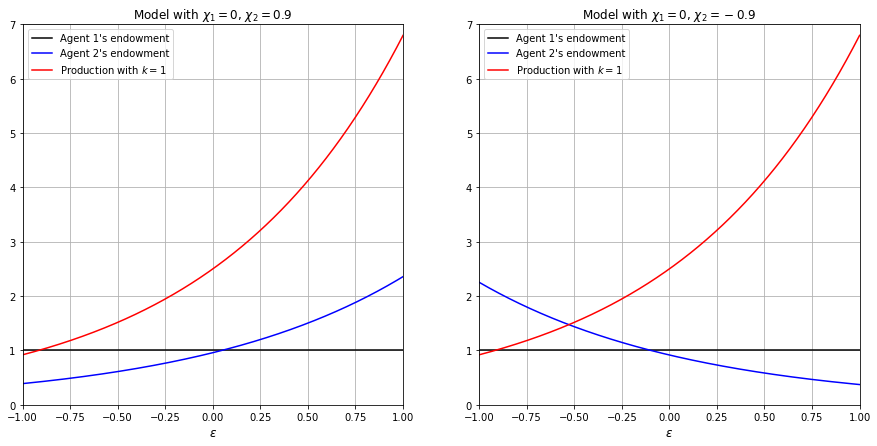

In [5]:
#==== Figure 1: HH endowments and firm productivity ====#
# Realizations of innovation from -3 to 3
epsgrid = np.linspace(-1,1,1000)


fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].plot(epsgrid, mdl1.w11(epsgrid), color='black', label='Agent 1\'s endowment')
ax[0].plot(epsgrid, mdl1.w21(epsgrid), color='blue', label='Agent 2\'s endowment')
ax[0].plot(epsgrid, mdl1.Y(epsgrid,1), color='red', label=r'Production with $k=1$')
ax[0].set_xlim([-1,1])
ax[0].set_ylim([0,7])
ax[0].set_xlabel(r'$\epsilon$',fontsize=12)
ax[0].set_title(r'Model with $\chi_1 = 0$, $\chi_2 = 0.9$')
ax[0].legend()
ax[0].grid()

ax[1].plot(epsgrid, mdl2.w11(epsgrid), color='black', label='Agent 1\'s endowment')
ax[1].plot(epsgrid, mdl2.w21(epsgrid), color='blue', label='Agent 2\'s endowment')
ax[1].plot(epsgrid, mdl2.Y(epsgrid,1), color='red', label=r'Production with $k=1$')
ax[1].set_xlim([-1,1])
ax[1].set_ylim([0,7])
ax[1].set_xlabel(r'$\epsilon$',fontsize=12)
ax[1].set_title(r'Model with $\chi_1 = 0$, $\chi_2 = -0.9$')
ax[1].legend()
ax[1].grid()

plt.show()

Let’s also compare the optimal capital stock, $k$, and optimal
time-0 consumption of agent 2, $c^2_0$, for the two models:

In [6]:
# Print optimal k
kk_1 = mdl1.opt_k()
kk_2 = mdl2.opt_k()

print('The optimal k for model 1: {:.5f}'.format(kk_1))
print('The optimal k for model 2: {:.5f}'.format(kk_2))

# Print optimal time-0 consumption for agent 2
c20_1 = mdl1.opt_c(k=kk_1)[1]
c20_2 = mdl2.opt_c(k=kk_2)[1]

print('The optimal c20 for model 1: {:.5f}'.format(c20_1))
print('The optimal c20 for model 2: {:.5f}'.format(c20_2))

The optimal k for model 1: 0.14235
The optimal k for model 2: 0.13791


The optimal c20 for model 1: 0.90205
The optimal c20 for model 2: 0.92862


#### 2nd example

In the second example, we illustrate how the optimal choice of $k$
is influenced by the correlation parameter $\chi_i$.

We will need to install the `plotly` package for 3D illustration. See
[https://plotly.com/python/getting-started/](https://plotly.com/python/getting-started/) for further instructions.

In [7]:
# Mesh grid of 𝜒
N = 30
𝜒1grid, 𝜒2grid = np.meshgrid(np.linspace(-1,1,N),
                             np.linspace(-1,1,N))

k_foc = k_foc_factory(mdl1)

# Create grid for k
kgrid = np.zeros_like(𝜒1grid)

w0 = mdl1.w0

@njit(parallel=True)
def fill_k_grid(kgrid):
    # Loop: Compute optimal k and
    for i in prange(N):
        for j in prange(N):
            X1 = 𝜒1grid[i, j]
            X2 = 𝜒2grid[i, j]
            k = root_finding.newton_secant(k_foc, 1e-2, args=(X1, X2)).root
            kgrid[i, j] = k

In [8]:
%%time
fill_k_grid(kgrid)

CPU times: user 2.58 s, sys: 28.5 ms, total: 2.61 s
Wall time: 2.6 s


In [9]:
%%time
# Second-run
fill_k_grid(kgrid)

CPU times: user 45.4 ms, sys: 886 µs, total: 46.3 ms
Wall time: 7.83 ms


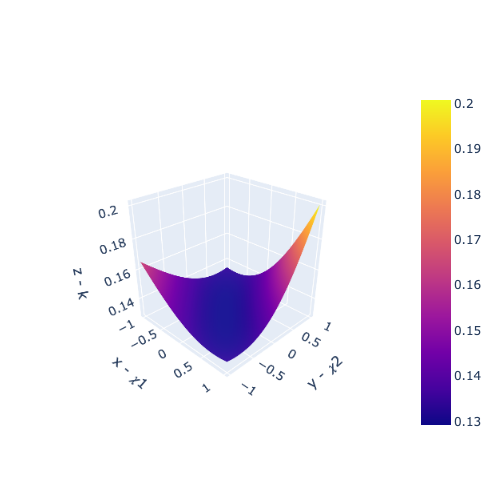

In [10]:
#=== Example: Plot optimal k with different correlations ===#

from IPython.display import Image
# Import plotly
import plotly.graph_objs as go

# Plot optimal k
fig = go.Figure(data=[go.Surface(x=𝜒1grid, y=𝜒2grid, z=kgrid)])
fig.update_layout(scene = dict(xaxis_title='x - 𝜒1',
                               yaxis_title='y - 𝜒2',
                               zaxis_title='z - k',
                               aspectratio=dict(x=1,y=1,z=1)))
fig.update_layout(width=500,
                  height=500,
                  margin=dict(l=50, r=50, b=65, t=90))
fig.update_layout(scene_camera=dict(eye=dict(x=2, y=-2, z=1.5)))

# Export to PNG file
Image(fig.to_image(format="png"))
# fig.show() will provide interactive plot when running
# notebook locally